<div style="background-color:rgba(255,215,0, 0.55); padding: 5px; border-radius: 13px;">
    <h2 align="center" style="color:royalblue; font-family:Fantasy;">Music composition with Python</h2>
    <div align="center" style="margin-top: 25px; margin-right: 75px;"><b>Distributional Compositional Python (a.k.a DisCoPy)</b> ~ <i>Denisa Vítková</i></div>
    <img src="https://openclipart.org/image/800px/305050" width=75px style="position: absolute; top:0; right:0; margin: 20px 5px" />
</div>

_Categorical Compositional Distributional Semantics (DisCoCat)_ is a model that uses category theory to combine the benefits of two very different approaches to linguistics: categorial grammar and distributional semantics.

- __What__ is DisCoPy a.k.a. Distributional Compositional Python? <br/>
    _It is a toolbox for computing with string diagrams, monoidal categories and strong monoidal functors in Python._ <a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2)<br/>
- __Why__ do we use DisCoPy? <br/>
    _DisCoPy acts as lambeq’s underlying engine. It supports pregroup grammar and functors for implementing compositional models. Moreover, it provides us with tools for creating quantum circuits which are later used for processing with lambeq while performing QNLP._ <a name="cite_ref-4"></a>[<sup>[4]</sup>](#cite_note-4)<br/>
- __How__ to use it for music generation? <br/>
    _We can define different musical elements in terms of language grammar, we can use functors to translate musical elements to mathematical expressions, then create quantum circuits, use QNLP and generate music._

### Content
1. [Musical elements and Grammatical structure](#Musical-elements-and-Grammatical-structure)
2. [Functors - translating tools](#Functors---translating-tools)
3. [Quantum circuits in DisCoPy](#Quantum-circuits-in-DisCoPy)
4. [Putting it all together - QNLP](#Putting-it-all-together---QNLP)
5. [References](#References)

## Musical elements and Grammatical structure
Using Python, we can define different musical elements in terms of language grammar, <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1)<a name="cite_ref-3"></a>[<sup>[3]</sup>](#cite_note-3) let's have the following table: <br/>

| Music                 | Language Grammar |
| :-                    | -:               |
| musical compositions  | sentences        |
| musical snippets      | words            |
| musical pitches       | letters          |
| sequencing            | verbs            |
|                       |                  |
| cups                  | mapping snippets into sequencer  |

### Grammatical representation of musical elements

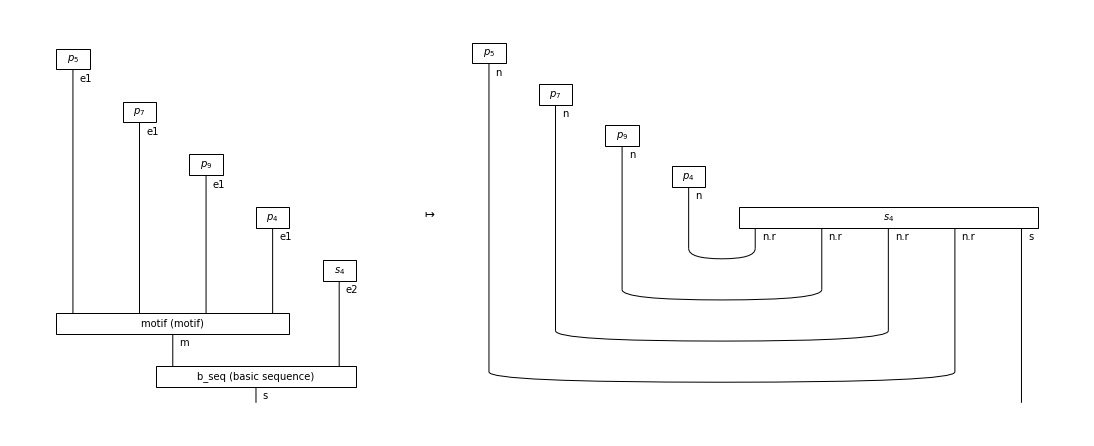

In [16]:
from discopy import Box, drawing, Id, Ob, Ty, Word, Cap, Cup, pregroup, Diagram, drawing

n, s = Ty('n'), Ty('s') # Atomic pregroup types
e1 = Ty('e1') # Primary musical element
e2 = Ty('e2') # Seconday musical element
m  = Ty('m')  # Musical motif

motif = Box('motif (motif)', e1 @ e1 @ e1 @ e1, m) # motif
b_seq = Box('b_seq (basic sequence)', m @ e2, s) # basic sequence

p_5 = Box('$p_{5}$', Ty(), e1)
p_7 = Box('$p_{7}$', Ty(), e1)
p_9 = Box('$p_{9}$', Ty(), e1)
p_4 = Box('$p_{4}$', Ty(), e1)
s_4 = Box('$s_{4}$', Ty(), e2)

p5 = Word("$p_5$", n)
p7 = Word("$p_7$", n)
p9 = Word("$p_9$", n)
p4 = Word("$p_4$", n)
s4 = Word("$s_4$", n.r @ n.r @ n.r @ n.r @ s)

boxes = p_5 @ p_7 @ p_9 @ p_4 @ s_4 >> motif @ Id(e2) >> b_seq
grammar = Diagram.cups(n @ n @ n @ n, n.r @ n.r @ n.r @ n.r) @ Id(s)
diagram = p5 @ p7 @ p9 @ p4 @ s4 >> grammar

drawing.equation(
    boxes, diagram,
    symbol="$\\mapsto$", figsize = (15, 6)
)

---

## Functors - translating tools

Functors are often used for translating diagrams into another language. In our case, it will be the language of mathematics, specifically we will make use of tensors represented by vectors and matrices.

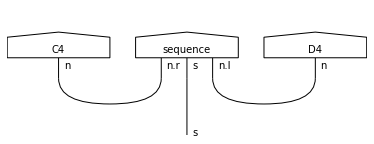

Tensor(dom=Dim(1), cod=Dim(2, 2, 2, 2), array=[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])
Tensor(dom=Dim(2, 2, 2, 2), cod=Dim(1), array=[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])


In [23]:
from discopy import tensor

C4 = Word("C4", n)
sequence = Word("sequence", n.r @ s @ n.l)
D4 = Word("D4", n)

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)
sentence = C4 @ sequence @ D4 >> grammar
pregroup.draw(sentence, figsize=(5, 5))

F = tensor.Functor(
    ob={n: 2, s: 1},
    ar={C4: [0, 1], sequence: [0, 1, 1, 0], D4: [1, 0]}
)

print(F(C4 @ sequence @ D4))
print(F(grammar))

---

## Quantum circuits in DisCoPy

Example of a circuit which generates the next pitch after `111` (C5), that is either `101` (A4) or `110` (B4)<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1)

### DisCoPy quantum circuit

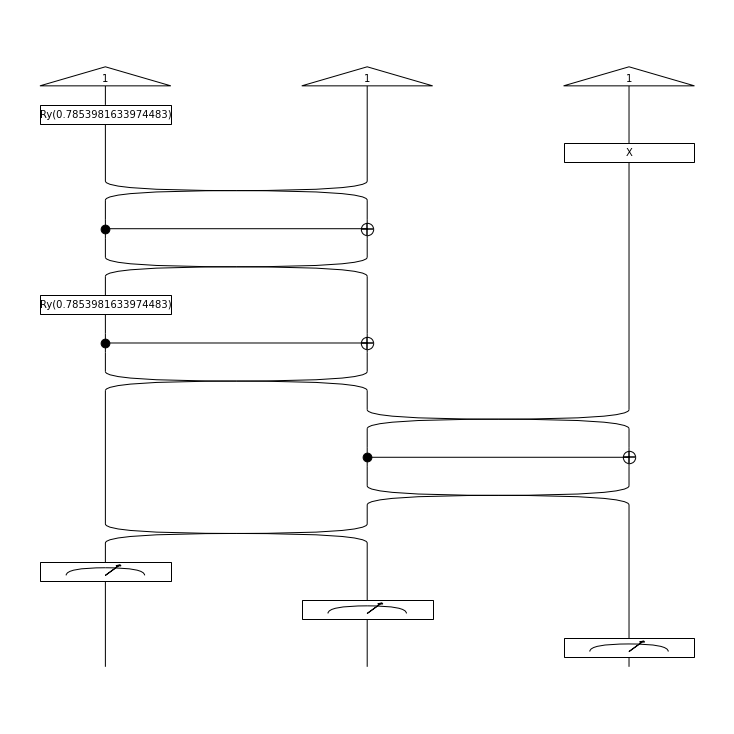

In [18]:
from discopy.quantum import *
import pytket as tk
from pytket.extensions.qiskit import tk_to_qiskit, AerBackend
from numpy import pi

XC = SWAP @ Id(1) >> CX @ Id(1) >>  SWAP @ Id(1)
CX2 = SWAP @ Id(1) >>  Id(1) @ SWAP >> Id(1) @ CX >> Id(1) @ SWAP >> SWAP @ Id(1)

circuit = Ry(pi/4) @ Id(1) @ X >> XC >> Ry(pi/4) @ Id(2)>>  CX @ Id(1) >> CX2
experiment = Ket(1,1,1) >> circuit >> Measure() @ Measure() @ Measure()

experiment.draw(figsize=(10, 10), draw_type_labels=False)

### Quantum circuit in |tket> notation

Translating into $|tket〉$ notation allows us to run the circuit on quantum hardware. 

In [12]:
expr_to_tk = Ket(0,0,0) >> Ry(1/8) @ Id(1) @ X >> XC >> Ry(1/8) @ Id(2)>>  CX @ Id(1) >> CX2 >> Measure() @ Measure() @ Measure()
expr_to_tk.to_tk()

tk.Circuit(3, 3).Ry(0.25, 0).X(2).CX(1, 0).Ry(0.25, 0).CX(0, 1).Measure(1, 1).CX(2, 0).Measure(0, 0).Measure(2, 2)

In [13]:
tk_circuit = tk.Circuit(3,3).Ry(1/4, 0).X(2).CX(1,0).Ry(1/4, 0).CX(0,1).CX(2,0).Measure(0, 0).Measure(1, 1).Measure(2,2)

qiskit_circuit = tk_to_qiskit(tk_circuit)
qiskit_circuit.draw()

┌─────────┐┌───┐┌─────────┐        ┌───┐┌─┐   
q_0: ┤ Ry(π/4) ├┤ X ├┤ Ry(π/4) ├──■─────┤ X ├┤M├───
     └─────────┘└─┬─┘└─────────┘┌─┴─┐┌─┐└─┬─┘└╥┘   
q_1: ─────────────■─────────────┤ X ├┤M├──┼───╫────
        ┌───┐                   └───┘└╥┘  │   ║ ┌─┐
q_2: ───┤ X ├─────────────────────────╫───■───╫─┤M├
        └───┘                         ║       ║ └╥┘
c: 3/═════════════════════════════════╩═══════╩══╩═
                                      1       0  2

### Results of a job run on a quantum simulator

In [20]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

job = execute(qiskit_circuit, Aer.get_backend('qasm_simulator'), shots=1024)
counts = job.result().get_counts(qiskit_circuit)
print("counts:", counts)

counts: {'101': 513, '110': 511}


---

## Putting it all together - QNLP

So far, we have learned about DisCoPy diagrams that:
1. Diagrams can represent musical snippets, and functors can be used for translating diagrams.
2. Diagrams can represent any tensor network, and tensor functors contract the network.
3. Diagrams can represent any quantum circuit, and tensor functors simulate the circuit.
4. Diagrams can represent any grammatical sentence, and tensor functors compute the meaning.<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2)

To make the process more efficient, we have $$F = \mathbf{Grammar} \xrightarrow{F'} \mathbf{Circuit} \xrightarrow{\mathrm{eval}} \mathbf{Tensor}$$ instead of $$F : \mathbf{Grammar} \to \mathbf{Tensor}$$

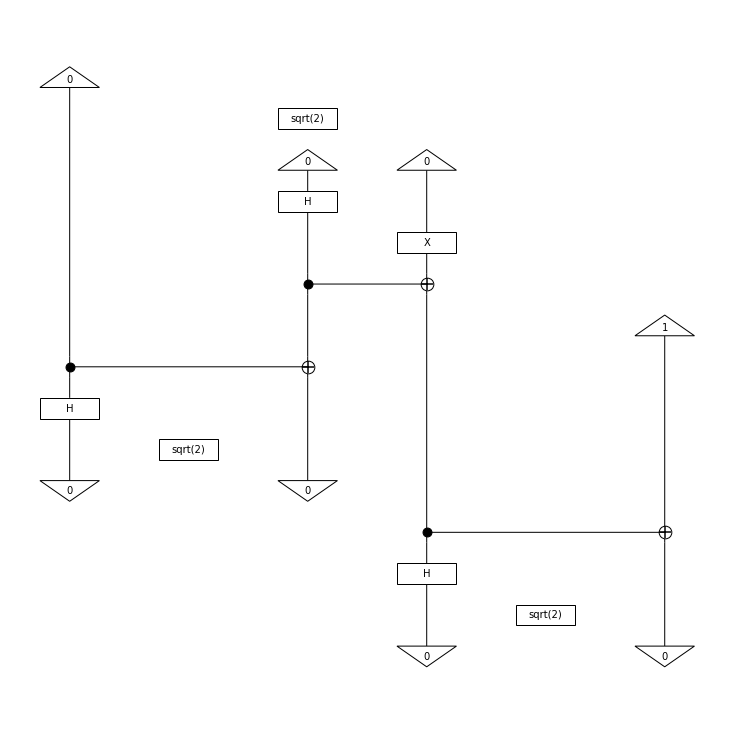

In [24]:
from discopy.quantum import *

F_ = circuit.Functor(
    ob={s: Ty(), n: qubit},
    ar={C4: Ket(0),
        sequence: sqrt(2) @ Ket(0, 0) >> H @ X >> CX,
        D4: Ket(1)}
)

F_(sentence).draw(figsize=(10, 10))

---

## References

<a name="cite_note-1"></a>1. [^](#cite_ref-1) Miranda, E. R., Yeung, R., Pearson, A., Meichanetzidis, K., & Coecke, B. (2021) _A Quantum Natural Language Processing Approach to Musical Intelligence._ [arXiv:2111.06741v2](https://arxiv.org/abs/2111.06741v2)
<br/>
<a name="cite_note-2"></a>2. [^](#cite_ref-2) Oxford Quantum Group (2020 - today) _Distributional Compositional Python_ [DisCoPy on GitHub](https://github.com/oxford-quantum-group/discopy)
<br/>
<a name="cite_note-3"></a>3. [^](#cite_ref-3) Cambridge Quantum - 1st ISQCMC (2021) _A QNLP Approach to Musical Intelligence_ [YouTube video](https://youtu.be/ARkd1RUXsoE?list=PLRmEp241YK0p9cuQr6m3FKkR4rlji-7zt)
<br/>
<a name="cite_note-4"></a>4. [^](#cite_ref-4) Cambridge Quantum Computing Ltd. (2021-2022) _DisCoPy_ [DisCoPy on Lambeq website](https://cqcl.github.io/lambeq/discopy.html)

### Further reading
1. de Felice, G., Toumi, A., & Coecke, B. (2021) _DisCoPy: Monoidal Categories in Python._ [arXiv:2005.02975](https://arxiv.org/abs/2005.02975)
2. Oxford Quantum Group (2019) _Distributional Compositional Python_ [website documentation](https://discopy.readthedocs.io/en/main/index.html) and [pdf documentation](https://discopy.readthedocs.io/_/downloads/en/docs/pdf/)
3. nLab authors (2022) _DisCoPy_ [nLab website](http://ncatlab.org/nlab/revision/DisCoPy/10)